In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('../data/raw/onlinefraud.csv')
debit = df[df['type']=='DEBIT']
debit.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,0,0
21,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.0,16896.70,0,0
22,1,DEBIT,1065.41,C1959239586,1817.0,751.59,C515132998,10330.0,0.00,0,0
41,1,DEBIT,5758.59,C1466917878,32604.0,26845.41,C1297685781,209699.0,16997.22,0,0


In [3]:
debit.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362247,718,DEBIT,2063.08,C397492133,328612.0,326548.92,C1557979171,1312720.98,1314784.06,0,0
6362254,718,DEBIT,425.65,C1835928822,4046.0,3620.35,C701975669,3009282.73,3009708.38,0,0
6362282,718,DEBIT,1636.03,C761454361,83120.0,81483.97,C355970563,8393318.02,8394954.05,0,0
6362303,718,DEBIT,2148.99,C1909103796,49632.0,47483.01,C1931871221,66241.39,68390.38,0,0
6362323,718,DEBIT,1864.24,C49652609,20426.0,18561.76,C1799009964,188746.00,190610.24,0,0


In [4]:
debit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41432 entries, 9 to 6362323
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            41432 non-null  int64  
 1   type            41432 non-null  object 
 2   amount          41432 non-null  float64
 3   nameOrig        41432 non-null  object 
 4   oldbalanceOrg   41432 non-null  float64
 5   newbalanceOrig  41432 non-null  float64
 6   nameDest        41432 non-null  object 
 7   oldbalanceDest  41432 non-null  float64
 8   newbalanceDest  41432 non-null  float64
 9   isFraud         41432 non-null  int64  
 10  isFlaggedFraud  41432 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 3.8+ MB


In [6]:
debit.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,41432.000000,41432.000000,4.143200e+04,4.143200e+04,4.143200e+04,4.143200e+04,41432.0,41432.0
mean,248.440481,5483.665314,6.864734e+04,6.516165e+04,1.493136e+06,1.513003e+06,0.0,0.0
std,149.843650,13318.535518,1.384493e+05,1.376566e+05,4.386970e+06,4.395708e+06,0.0,0.0
min,1.000000,0.550000,0.000000e+00,0.000000e+00,8.500000e+01,0.000000e+00,0.0,0.0
25%,153.000000,1500.180000,1.518500e+03,0.000000e+00,1.300251e+05,1.365075e+05,0.0,0.0
50%,252.000000,3048.990000,2.082111e+04,1.663242e+04,4.244604e+05,4.393289e+05,0.0,0.0
75%,350.000000,5479.175000,6.880661e+04,6.263080e+04,1.372975e+06,1.404072e+06,0.0,0.0
max,718.000000,569077.510000,4.362014e+06,4.359375e+06,3.278278e+08,3.278521e+08,0.0,0.0


In [7]:
debit.shape

(41432, 11)

C:\Users\ethan\AppData\Local\Temp\ipykernel_29872\1606726992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=debit, x='isFraud', palette='pastel')


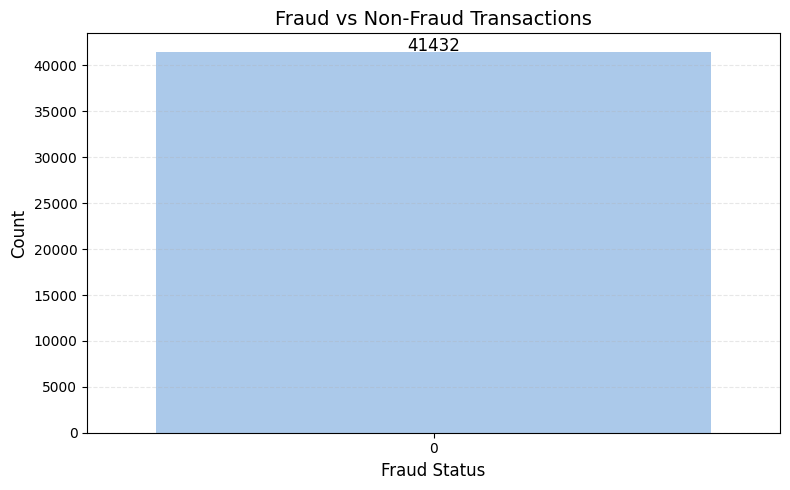

In [9]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=debit, x='isFraud', palette='pastel')

# Add the numbers manually using plt.text
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 100, f'{count}', ha='center', color='black', fontsize=12)

# Set titles and labels
plt.title('Fraud vs Non-Fraud Transactions', fontsize=14, color='black')
plt.xlabel('Fraud Status', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()